In [66]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import soundfile as sf

from IPython.display import Audio

%matplotlib inline

# What is sound?

# How is sound represented in a computer?

In [56]:
sample_rate = 44100
frequency = 440
twopi = 2 * np.pi

time = np.linspace(0, 1, sample_rate, endpoint=False)

## Simple Oscillators

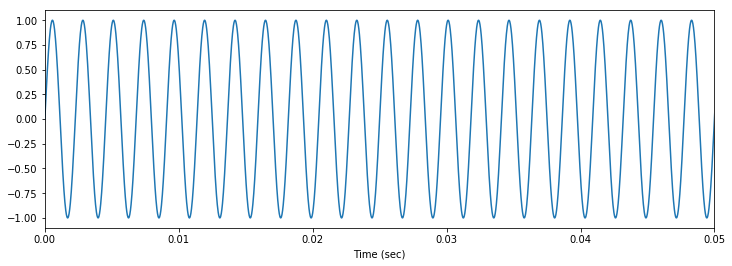

In [15]:
sinewave = np.sin(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(time, sinewave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(sinewave, rate=rate)

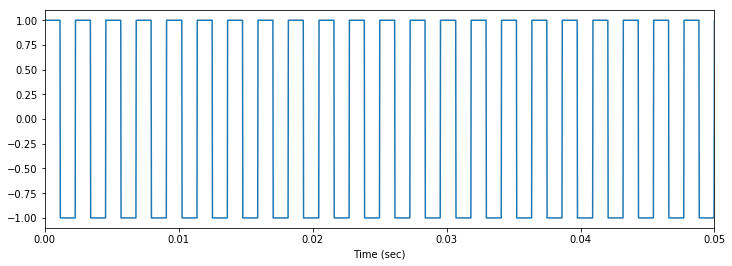

In [16]:
squarewave = scipy.signal.square(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(times, squarewave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(squarewave, rate=rate)

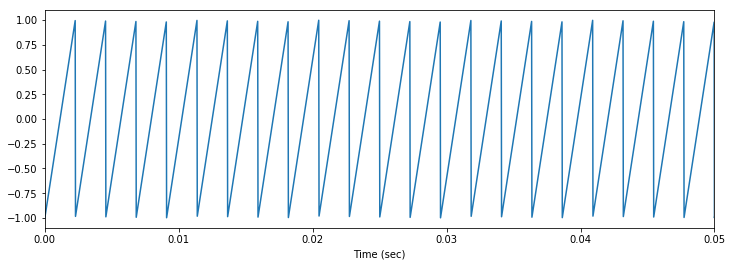

In [21]:
sawwave = scipy.signal.sawtooth(twopi * frequency * time)

plt.figure(figsize=(12, 4))
plt.plot(times, sawwave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(sawwave, rate=rate)

## Additive Synthesis

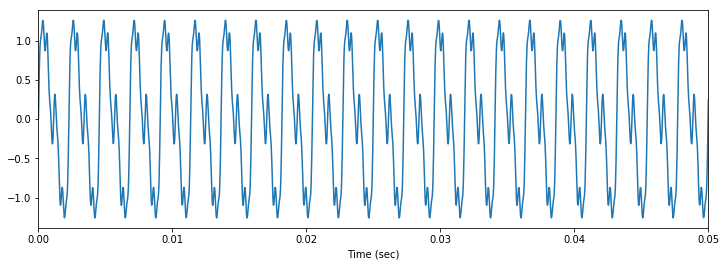

In [26]:
complex_wave = np.sin(twopi * frequency * times)
complex_wave += (1 / 2) * np.sin(twopi * 2 * frequency * times)
complex_wave += (1 / 4) * np.sin(twopi * 4 * frequency * times)
complex_wave += (1 / 8) * np.sin(twopi * 8 * frequency * times)

plt.figure(figsize=(12, 4))
plt.plot(times, complex_wave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(complex_wave, rate=rate)

## FM Synthesis

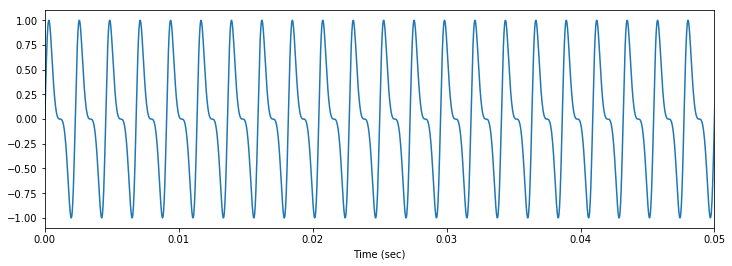

In [65]:
beta = 1
frequency_mod = 440
fm_wave = np.sin((twopi * frequency * time) + beta * np.sin(twopi * frequency_mod * time))

plt.figure(figsize=(12, 4))
plt.plot(times, fm_wave)
plt.xlim(0, 0.05)
plt.xlabel("Time (sec)")

Audio(fm_wave, rate=rate)

## Envelopes

Attack

Decay

Sustain

Release

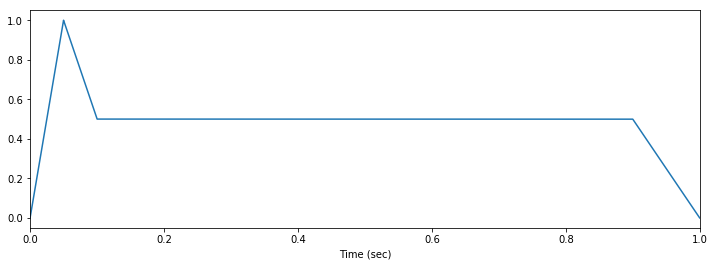

In [38]:
attack = 0.05
decay = 0.05
release = 0.1
sustain = 1 - (attack + decay + release)

peak_level = 1.0
sustain_level = 0.5

envelope = np.concatenate([np.linspace(0, peak_level, int(attack * rate), endpoint=False),
                           np.linspace(peak_level, sustain_level, int(decay * rate), endpoint=False),
                           np.linspace(sustain_level, sustain_level, int(sustain * rate), endpoint=False),
                           np.linspace(sustain_level, 0, int(release * rate), endpoint=False)])

plt.figure(figsize=(12, 4))
plt.plot(times, envelope)
plt.xlim(0, 1)
plt.xlabel("Time (sec)")

Audio(envelope * fm_wave, rate=rate)

## Generic Tone Generator

In [50]:
def create_note(frequency, duration, 
                attack=0.05, decay=0.05, release=0.1, 
                peak_level=1.0, sustain_level=0.5,
                sample_rate=44100):
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    sinewave = np.sin(twopi * frequency * time)

    sustain = duration - (attack + decay + release)
    envelope = np.concatenate([np.linspace(0, peak_level, int(attack * sample_rate), endpoint=False),
                               np.linspace(peak_level, sustain_level, int(decay * sample_rate), endpoint=False),
                               np.linspace(sustain_level, sustain_level, int(sustain * sample_rate), endpoint=False),
                               np.linspace(sustain_level, 0, int(release * sample_rate), endpoint=False)])
    return envelope * sinewave

In [54]:
Audio(create_note(350, 1.0), rate=sample_rate)

## Frequency <==> Notes

In [44]:
notes = np.arange(0, 88)
frequency = 27.5 * np.power(2.0, notes / 12)

Text(0, 0.5, 'Frequency')

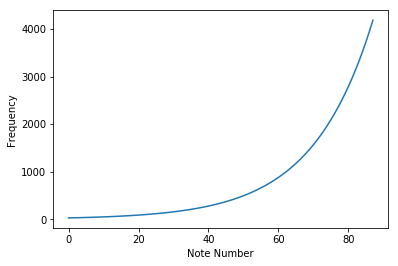

In [45]:
plt.plot(notes, frequency)
plt.xlabel('Note Number')
plt.ylabel('Frequency')